# ESS 330 Final Project Report - Lab 9

Zachary Cramton (Colorado State University)  
Bella Conrad (Colorado State University)  
Rachel Delorie (Colorado State University)

# Urbanization, Density and Access to Public Parks in the United States

## Abstract

### Introduction

Since 2008, the majority of the world’s population has lived in urban areas, a result of urbanization in developing countries \[@kohlhase2013new; @beall2010urbanization\]. The United States developed earlier than many nations, with more than 50 percent of the population living in urban areas by by the 14th Census in 1920.

> **Definition of Urban Areas in Census History**
>
> Prior to the 2020 Census urban areas were defined as any area with greater than 2500 people. Following the 2010 census urban clusters described areas with populations greater than 2,500 and less than 50,000; urbanized areas described areas with a population greater than 50,000. For the 2020 Census the threshold was changed to 5000 people \[@ratcliffe_redefining_2022\].

In the century since the 1920 census the percentage of individuals living in urban areas has increased to 80.7% \[@slack2020changing\]. As more people moved to urban areas, those areas expanded forming urbanized areas and large cities.

Urban planning has existed for centuries out of necessity, historically dominated by efficiency and utilitarianism, optimizing the world we live in for profitability, corporate productivity, and automobile-based mobility. This optimization came with sacrifices, which now impact an increasingly large majority of the population. In recent years, the discipline has begun to prioritize human factors over utilitarian efficiency. Thousands of years of living in rural settings makes urban living hard for most people’s biology. Connection to nature and time outdoors even in small amounts has been shown to be a vital part maintaining physical and mental health (nature&health). In an effort to make urban spaces more livable, planners are turning to parks and natural areas to connect people to nature.

Equity issues aside, overturning and correcting more than a century of bad planning is a daunting task. Many cities filled in and built up over the course of the 20th century as land became a premium commodity. How does this density present significant challenges for today’s planning professionals? This research seeks to investigate the relationship between urban demographics like density, and park access. In exploring this relationship, we hypothesize that there is an intermediate/sublinear relationship between urban population density and public open space availability.

### Data Overview

This report uses data from the UN-Habitat Urban Indicators Database and the ParkServe® Database maintained by the Trust for Public Land. The UN data relates to the UN-SDG 11.7.1 pertaining to access to open spaces and green areas.

The January 2025 version of the UN Open Spaces and Green Areas data includes the average share of urban areas allocated to streets and open public spaces as well as the share of the urban population with convenient access to an open public space.

> **UN Definition**
>
> In this case, the UN defines “convenient access to an open public space” as the “urban population withing 400 meters walking distance along the street network to an open public space” \[@may2000habitat\].

These data collected by the UN were collected in 2020 and provided as a .xls format spreadsheet. These data were converted to .csv format with Microsoft Excel. The ParkServe® data selected for use is the 2020 data set to match the year the UN data was recorded. Specifically, this report uses elements of the City Park Facts: Acreage & Park System Highlights. The ParkServe® data is much less synthesized and was available as a .xml file. The file was structured for viewing as a spreadsheet rather than for further analysis and included multiple worksheets withing the workbook. In converting the file to a .csv file, the data spread across multiple worksheets was collated in a single worksheet and converted to a summarized dataset .csv file.

These data are lacking a shared numerical position data type but share a city name column formatted as “city_name, two_letter_state_abbreviation”. There is not perfect overlap between cities with data in each database however, there are 25 cities shared between the datasets. Cities present in only one data set will be culled when the data is joined.

### Methods

1.  Clean the data. The raw data were downloaded as Excel spreadsheets, some reformatting in Excel was required to effectively exporting as a .csv file and importing the new summarized file to RStudio. Remaining data cleaning will occur in R as needed including any header changes or additional columns needed.
2.  Conduct Exploratory Data Analysis (EDA).
3.  Join datasets by “city name” to have a complete working dataset. These data will be combined into a single data frame with an inner join because there is a large number of cities listed in one data set but not the other. The new dataset will include only cities found in both datasets, with columns from both.

> **Limiting Scope**
>
> The cities found in only one dataset will be cut from the data to accommodate the limited scope of the project. With a bigger scope it is possible that additional data could be used to understand these patterns with more depth.

1.  Prep data and split it into training and testing datasets. Perform a 3-fold cross-validation on training data.
2.  Create a recipe.
3.  Set up several models in regression mode.
4.  Create a workflow set including the previously written models and the recipe.
5.  Map function over workflow using workflow map.
6.  Using the highest performing model, fit the data and augment.
7.  Plot and graph data to visually display test results.
8.  Explore using the model to predict values for cities included in only one document (if time allows).

## Results

### Exploratory Data Analysis (EDA)

The data has already been discussed in general terms in the data overview section. There will be a readme file created to elaborate on the sources, formatting and manipulation required for each dataset before joining them into the urban_parks_data data frame. In general terms, prior to importing into RStudio, the .xml files the data came in were opened in MS Excel; the sheets were formatted to be converted to .csv files including condensing multiple worksheets of the ParkServe® data into a sinigle sheet for easier conversion to a .csv file. While some of the cleaning done in Excel could have been completed in RStudio, it was not efficient to do so. Using Excel was faster and more flexible for that use case. Similar reformatting was required with the UN data as the headers were unreasonably long by default. The readme that will be created for each (or both) files will include a more detailed summary of what each variable means.

In [ ]:
library(baguette)       # Model bagging methods for ensemble learning

Loading required package: parsnip

Loading required package: ggplot2

Registered S3 method overwritten by 'ggfortify':
  method          from   
  autoplot.glmnet parsnip

here() starts at C:/Users/Zacha/github/CSU/ESS_330/ess_330_final_project


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following objects are masked from 'package:flextable':

    highlight, style

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'purrr'

The following object is masked from 'package:flextable':

    compose

Loading required package: dplyr


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'recipes'

The following object is masked from 'package:stats':

    step

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ tidyr        1.3.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ rsample      1.2.1     ✔ yardstick    1.3.2
✔ tibble       3.2.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::compose()  masks flextable::compose()
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks plotly::filter(), stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ recipes::step()   masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::compose()    masks flextable::compose()
✖ scales::discard()   masks purrr::discard()
✖ dplyr::filter()     masks plotly::filter(), stats::filter()
✖ stringr::fixed()    masks recipes::fixed()
✖ dplyr::lag()        masks stats::lag()
✖ readr::spec()       masks yardstick::spec()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'vip'

The following object is masked from 'package:utils':

    vi


Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

The following object is masked from 'package:plotly':

    slice

Rows: 100 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): city_name, city_pop, land_area, revised_area, percent_designed_par...
dbl  (5): parkland_area, designed_park_area, natural_park_area, parkland_per...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 59 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): city_name
dbl (2): mean_percent_built_open_space, mean_percent_open_space_access

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 25
Columns: 23
$ city_name                      <chr> "Anchorage, AK", "Atlanta, GA", "Boston…
$ city_pop                       <dbl> 299100, 498059, 687725, 2744859, 377963…
$ land_area                      <dbl> 1090997, 85217, 30897, 145686, 49726, 2…
$ revised_area                   <dbl> 1086019, 84250, 29175, 136796, 46880, 2…
$ parkland_area                  <dbl> 914138, 5293, 5072, 13609, 3170, 20352,…
$ designed_park_area             <dbl> 2417, 3864, 2556, 8593, 1792, 10974, 40…
$ natural_park_area              <dbl> 911721, 1429, 2516, 4430, 1378, 9378, 1…
$ parkland_percent               <dbl> 84.173297, 6.282493, 17.384747, 9.94839…
$ percent_designed_parks         <dbl> 0.2644021, 73.0020782, 50.3943218, 63.1…
$ percent_natural_parks          <dbl> 99.735598, 26.997922, 49.605678, 32.551…
$ pop_density                    <dbl> 0.28, 5.91, 23.57, 20.07, 8.06, 6.39, 7…
$ parkland_per_1k_pop            <dbl> 3056.295553, 10.627255, 7.375041, 4.744…
$ park_units       

Variable,Mean,Median,Standard Deviation,1st Quartile (Q1),3rd Quartile (Q3)
city_pop,"1,113,559.56","655,061.00","1,696,534.55","377,963.00","1,006,142.00"
designed_park_area,"5,559.20","3,864.00","5,020.97","2,652.00","5,785.00"
dn_area_ratio,2.42,1.02,4.90,0.26,1.56
land_area,"178,285.40","88,800.00","224,466.29","53,723.00","201,635.00"
land_per_capita,0.33,0.16,0.70,0.08,0.28
mean_percent_built_open_space,18.71,18.20,3.23,17.20,20.60
mean_percent_open_space_access,42.06,40.00,17.04,29.80,52.80
natural_park_area,"48,113.72","4,538.00","180,621.84","1,429.00","22,527.00"
park_units,460.80,302.00,811.06,179.00,416.00
park_units_per_10k_pop,4.55,4.54,1.72,3.28,5.42


City Name,City Population,City Land Area (Revised) (Acres),Population Density (People/Acre),City Parkland Area (Acres),Designed-Natural Park Area Ratio (Designed Park (%) / Natural Park (%),Percent Parkland,Parkland Per (1000) Capita,Percent of Residents within 0.5 Miles of a Park,pop_near_parks
"Anchorage, AK","299,100","1,086,019",0.28,"914,138",0.00,84.17,"3,056.30",0.75,"224,597.2"
"New Orleans, LA","386,105","107,655",3.59,"27,775",0.11,25.80,71.94,0.80,"308,698.7"
"Washington, DC","702,321","38,955",18.03,"9,478",1.09,24.33,13.50,0.98,"690,170.8"
"New York, NY","8,627,852","187,946",45.91,"40,190",1.01,21.38,4.66,0.99,"8,539,502.8"
"San Diego, CA","1,399,844","205,918",6.80,"39,385",0.29,19.13,28.14,0.81,"1,127,322.4"
"Virginia Beach, VA","457,832","159,341",2.87,"28,312",0.26,17.77,61.84,0.68,"309,073.2"
"Boston, MA","687,725","29,175",23.57,"5,072",1.02,17.38,7.38,1.00,"686,280.8"
"Honolulu, HI","1,006,142","379,885",2.65,"57,141",0.09,15.04,56.79,0.79,"797,287.0"
"Minneapolis, MN","421,339","33,958",12.41,"5,075",8.47,14.94,12.04,0.98,"413,506.3"
"Jacksonville, FL","925,142","467,298",1.98,"67,707",0.14,14.49,73.19,0.35,"322,004.9"


City Name,City Population,City Land Area (Revised) (Acres),Population Density (People/Acre),City Parkland Area (Acres),Designed-Natural Park Area Ratio (Designed Park (%) / Natural Park (%),Percent Parkland,Parkland Per (1000) Capita,Percent of Residents within 0.5 Miles of a Park,pop_near_parks
"Durham, NC","275,758","68,678",4.02,"2,665",0.11,3.88,9.66,0.51,"141,094.34"
"Memphis, TN","655,061","196,098",3.34,"9,194",1.10,4.69,9.15,0.46,"300,312.72"
"Winston-Salem, NC","248,839","83,917",2.97,"4,263",7.34,5.08,17.13,0.37,"92,267.01"
"Detroit, MI","660,960","87,844",7.52,"5,102",3.63,5.81,7.72,0.80,"528,748.17"
"Toledo, OH","277,467","51,169",5.42,"3,175",1.41,6.20,11.44,0.81,"225,200.54"
"Atlanta, GA","498,059","84,250",5.91,"5,293",2.70,6.28,10.63,0.72,"360,828.80"
"Cleveland, OH","377,963","46,880",8.06,"3,170",1.30,6.76,8.39,0.83,"315,251.38"
"Dallas, TX","1,378,903","215,676",6.39,"20,352",1.17,9.44,14.76,0.71,"977,793.91"
"St. Louis, MO","310,144","39,090",7.93,"3,749",23.66,9.59,12.09,0.98,"303,354.95"
"Chicago, IL","2,744,859","136,796",20.07,"13,609",1.94,9.95,4.74,0.98,"2,696,000.51"


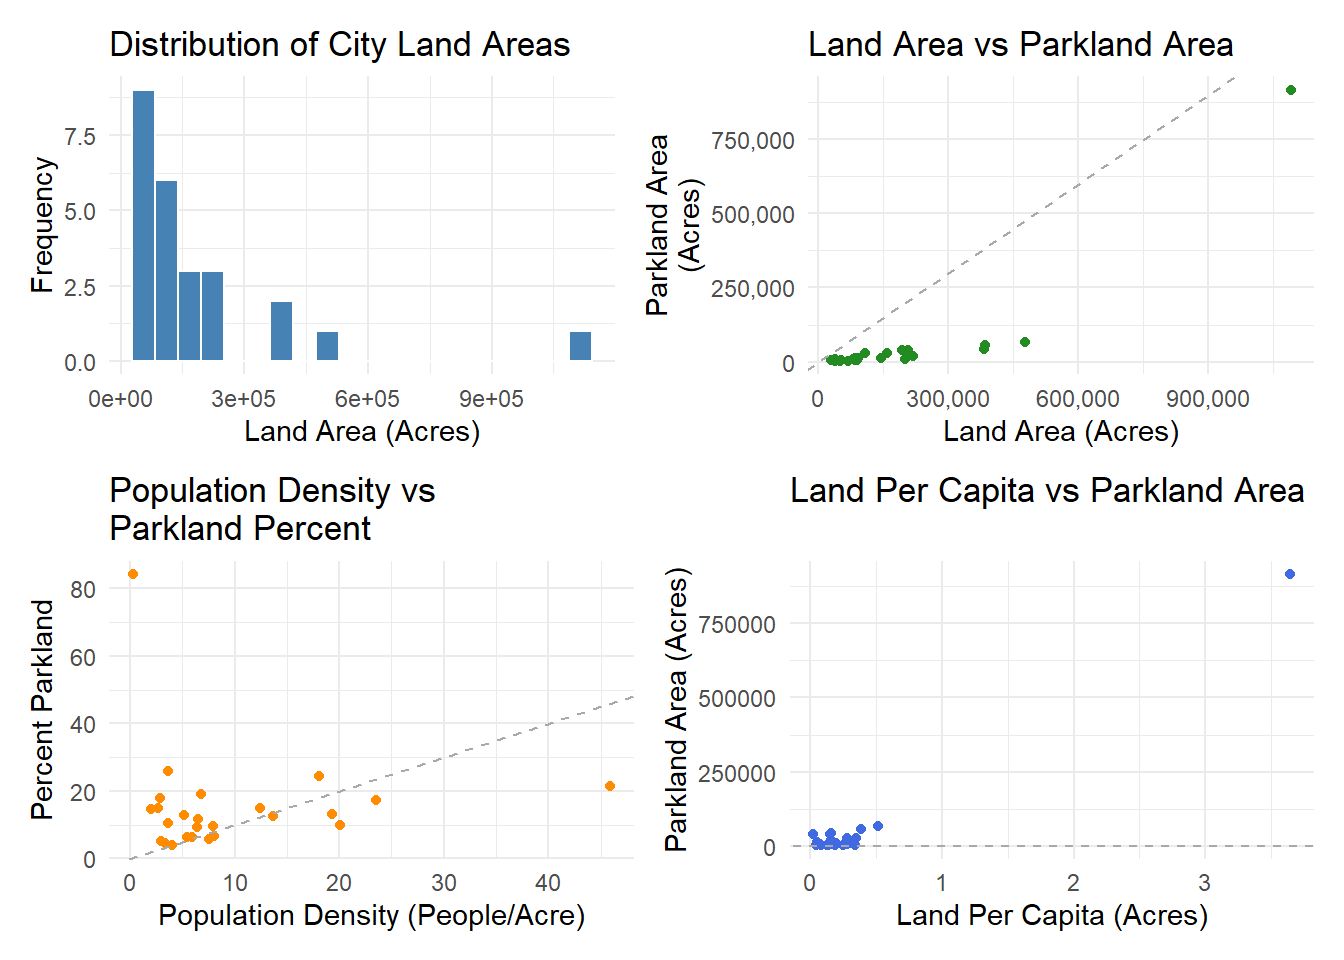

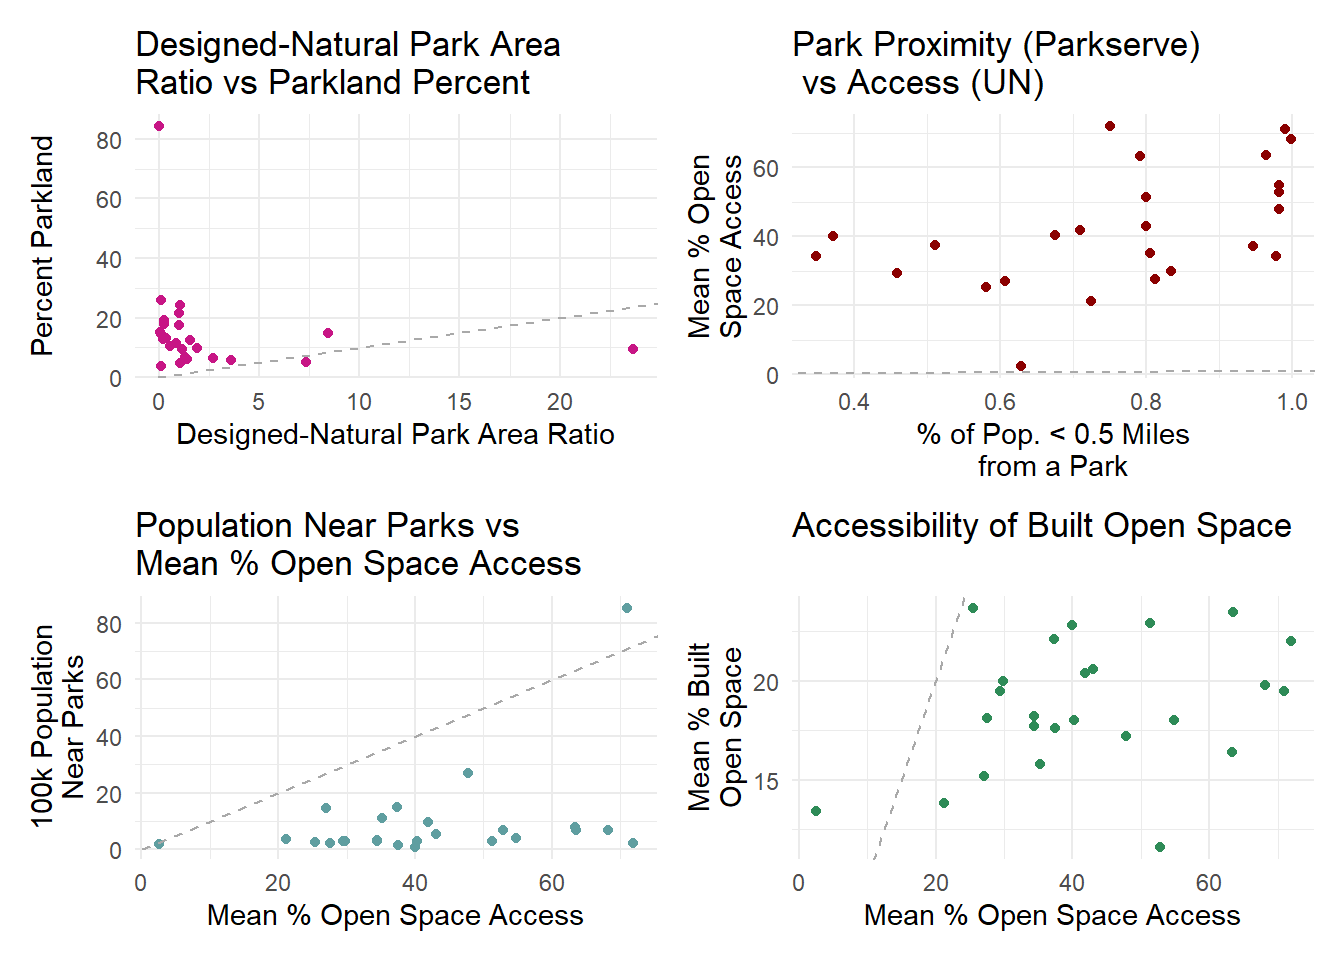

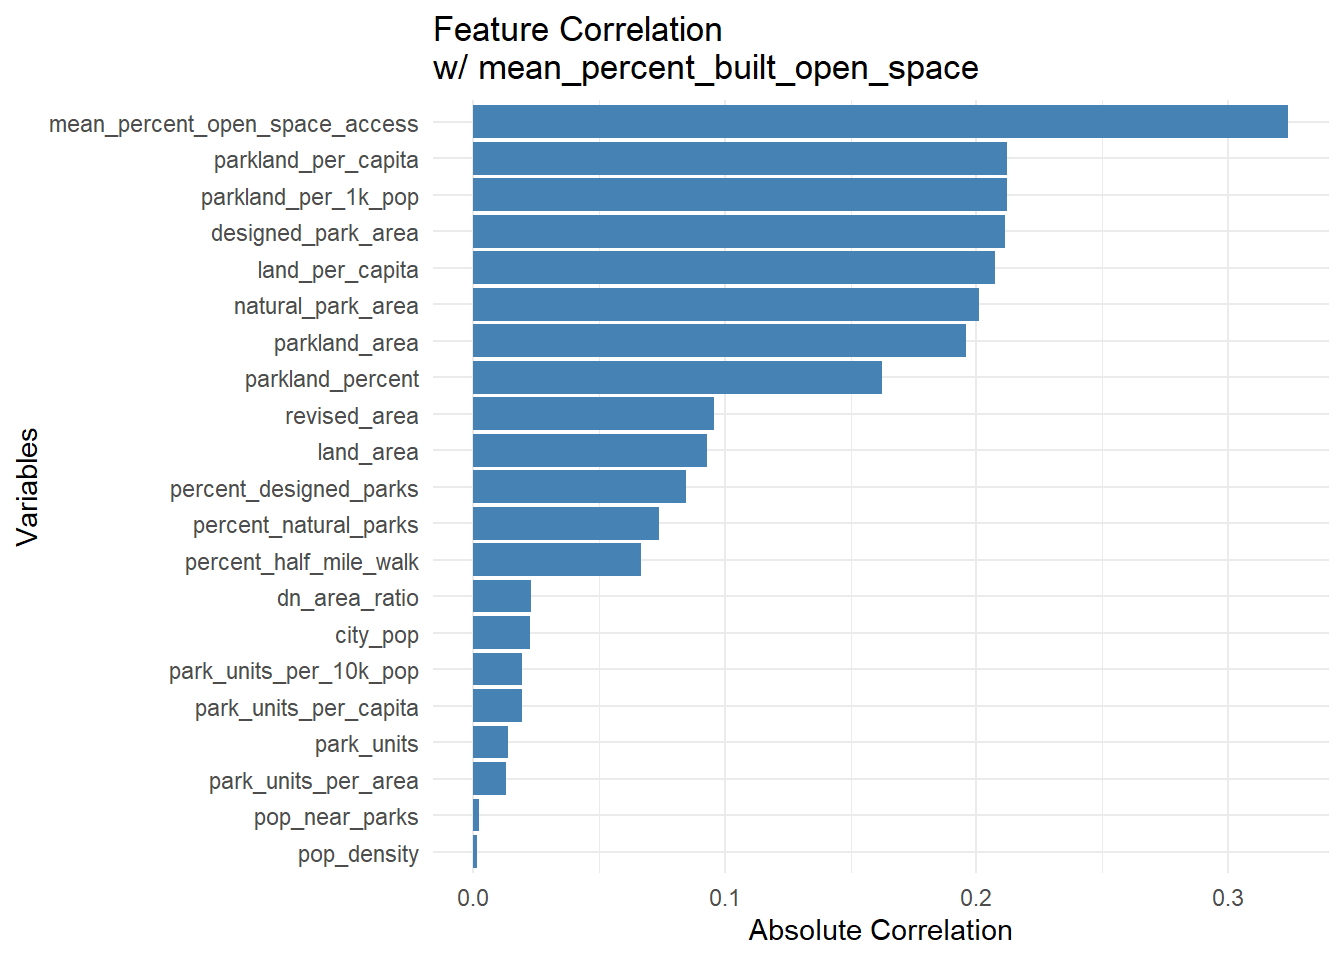

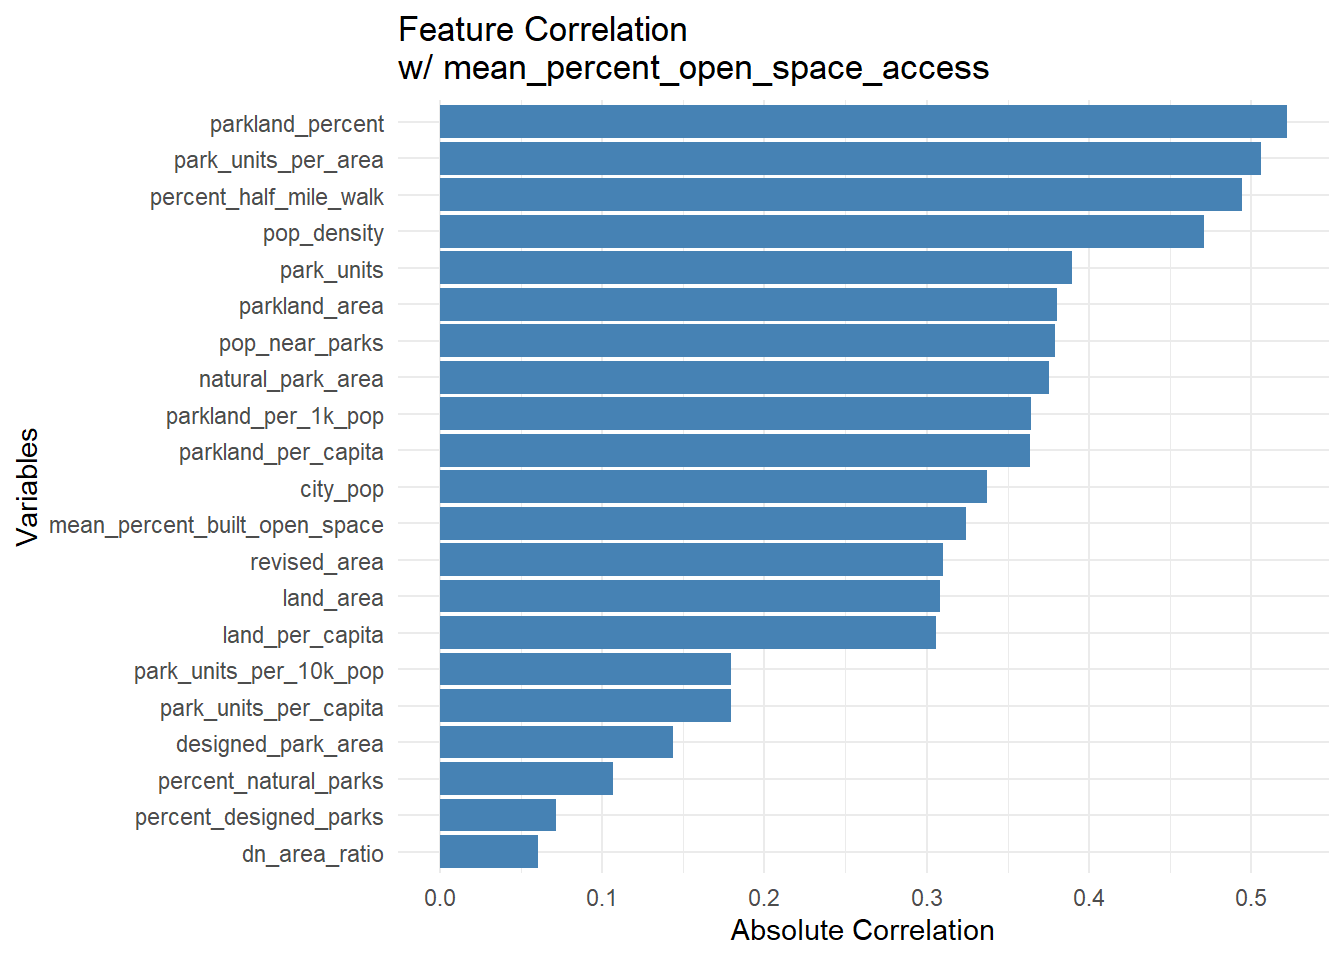

In [ ]:
# Descriptive Stats

  # Write function to round numeric columns to two decimal places
  round_numeric <- function(df) {
    df %>% 
      mutate(across(where(is.numeric), ~round(.x, 2)))
  }

  # Summarize stats by variable
    desc_stats_parks <- urban_parks_data %>% 
      select(where(is.numeric)) %>% 
      pivot_longer(cols = everything(), names_to = "variable", values_to = "value") %>% 
      group_by(variable) %>% 
      summarize(mean = mean(value, na.rm = TRUE), 
                median = median(value, na.rm = TRUE), 
                sd = sd(value, na.rm = TRUE),
                Q1 = quantile(value, 0.25, na.rm = TRUE),
                Q3 = quantile(value, 0.75, na.rm = TRUE)) %>% 
      round_numeric()
      
      # Print descriptive stats with flextable
      desc_stats_flex <- flextable(desc_stats_parks) %>%
        set_caption("Summarized Urban Parks Statistics") %>% 
        set_header_labels(
          variable = "Variable",
          mean = "Mean",
          median = "Median",
          sd = "Standard Deviation",
          Q1 = "1st Quartile (Q1)",
          Q3 = "3rd Quartile (Q3)") %>% 
        autofit()

# Find Top/Bottom cities for percent parkland
  
  # Select relevant columns
    simplified_vars <- c("city_name", "city_pop", "revised_area", "pop_density", "parkland_area", "dn_area_ratio", "parkland_percent", "parkland_per_1k_pop", "percent_half_mile_walk", "pop_near_parks")
  
  # Filter top/bottom 10 cities
  top10_park_percent <- urban_parks_data %>% 
    arrange(desc(parkland_percent)) %>% 
    slice_head(n = 10) %>% 
    select(all_of(simplified_vars)) %>% 
    round_numeric()
  
  bottom10_park_percent <- urban_parks_data %>% 
    arrange(parkland_percent) %>% 
    slice_head(n = 10) %>% 
    select(all_of(simplified_vars)) %>% 
    round_numeric()
  
  # Create top/bottom 10 flextables w/ function
  # Create function
  make_best_worst_flextbl <-function(df, caption) {
    flextable(df) %>% 
    set_caption(caption) %>%
    set_header_labels(
      city_name = "City Name",
      city_pop = "City Population",
      revised_area = "City Land Area (Revised) (Acres)",
      pop_density = "Population Density (People/Acre)",
      parkland_area = "City Parkland Area (Acres)",
      parkland_percent = "Percent Parkland",
      parkland_per_1k_pop = "Parkland Per (1000) Capita",
      percent_half_mile_walk = "Percent of Residents within 0.5 Miles of a Park",
      dn_area_ratio = "Designed-Natural Park Area Ratio (Designed Park (%) / Natural Park (%)") %>% 
    autofit()
  }
  
  top10_park_percent_flex <- make_best_worst_flextbl(top10_park_percent, "Top 10 Cities for Parkland Percentage")
  
  bottom10_park_percent_flex <- make_best_worst_flextbl(bottom10_park_percent, "Bottom 10 Cities for Parkland Percentage")
  
# Make plots to visualize the data
# Histogram: Land Area
land_area_plot <- ggplot(urban_parks_data, aes(x = as.numeric(land_area))) +
  geom_histogram(bins = 20, fill = "steelblue", color = "white") +
  labs(x = "Land Area (Acres)", y = "Frequency", title = "Distribution of City Land Areas") +
  theme_minimal()

# Scatterplot: Land Area vs Parkland Area
land_vs_park_area_plot <- ggplot(urban_parks_data, aes(x = as.numeric(land_area), y = parkland_area)) +
  geom_point(color = "forestgreen") +
  labs(x = "Land Area (Acres)", y = "Parkland Area\n(Acres)", title = "Land Area vs Parkland Area") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  scale_x_continuous(labels = scales::label_comma()) +
  scale_y_continuous(labels = scales::label_comma()) +
  theme_minimal()

# Scatterplot: Population Density vs Parkland Percent
density_vs_park_percent_plot <- ggplot(urban_parks_data, aes(x = as.numeric(pop_density), y = parkland_percent)) +
  geom_point(color = "darkorange") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "Population Density (People/Acre)", y = "Percent Parkland", title = "Population Density vs\nParkland Percent") +
  scale_x_continuous(labels = scales::label_comma()) +
  scale_y_continuous(labels = scales::label_comma()) +
  theme_minimal()

# Scatterplot: Designed-Natural Park Area Ratio vs Parkland Percent
dn_area_ratio_vs_park_percent_plot <- ggplot(urban_parks_data, aes(x = dn_area_ratio, y = parkland_percent)) +
  geom_point(color = "mediumvioletred") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "Designed-Natural Park Area Ratio", y = "Percent Parkland", title = "Designed-Natural Park Area\nRatio vs Parkland Percent") +
  scale_x_continuous(labels = scales::label_comma()) +
  scale_y_continuous(labels = scales::label_comma()) +
  theme_minimal()

# Scatterplot: Population Near Parks vs Mean % Open Space Access"
pop_park_proximity_plot <- ggplot(urban_parks_data, aes(x = mean_percent_open_space_access, y = (pop_near_parks/100000))) +
  geom_point(color = "cadetblue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "Mean % Open Space Access", y = "100k Population\nNear Parks", title = "Population Near Parks vs\nMean % Open Space Access") +
  theme_minimal()

# Scatterplot: Percent Open Space Access vs Percent Built Open Space
open_space_access_vs_built_plot <- ggplot(urban_parks_data, aes(x = mean_percent_open_space_access, y = mean_percent_built_open_space)) +
  geom_point(color = "seagreen") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "Mean % Open Space Access", y = "Mean % Built\nOpen Space", title = "Accessibility of Built Open Space") +
  theme_minimal()

# Scatterplot: Land Per Capita vs Parkland Area
land_pc_vs_park_area_plot <- ggplot(urban_parks_data, aes(x = land_per_capita, y = parkland_area)) +
  geom_point(color = "royalblue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "Land Per Capita (Acres)", y = "Parkland Area (Acres)", title = "Land Per Capita vs Parkland Area") +
  theme_minimal()

# Scatterplot: Parkserve Proxomity Data vs\nUN Access Data
pct_walk_vs_osa_plot <- ggplot(urban_parks_data, aes(x = percent_half_mile_walk, y = mean_percent_open_space_access)) +
  geom_point(color = "darkred") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "darkgray") +
  labs(x = "% of Pop. < 0.5 Miles\nfrom a Park", y = "Mean % Open\nSpace Access", title = "Park Proximity (Parkserve)\n vs Access (UN)") +
  theme_minimal()

# Use corr plots to show variables with strong impact on model outputs
  # Function to create a corr plot for a given target variable
  create_corr_plot <- function(data, target_var) {
    
    # Check if target_var exists in the dataset
    if (!(target_var %in% names(data))) {
      stop("Target variable not found in the dataset!")
    }
    
    # Compute correlation of all numeric variables with the target variable
    correlation_matrix <- cor(data %>% select_if(is.numeric), use = "complete.obs")  # Compute correlation matrix
    
    # Extract the correlation values for the target variable and convert to data frame
    correlation_data <- data.frame(
      variable = rownames(correlation_matrix),
      correlation = abs(correlation_matrix[target_var, ])
    ) %>%
        filter(variable != target_var) %>%  # Remove the target variable itself
        arrange(desc(correlation))  # Sort by correlation value
    
    # Create corr plot
    corr_plot <- ggplot(correlation_data, aes(x = reorder(variable, correlation), y = correlation)) +
      geom_bar(stat = "identity", fill = "steelblue") +
      coord_flip() +  # Flip coordinates to create horizontal bars
      labs(x = "Variables", y = "Absolute Correlation", title = paste("Feature Correlation\nw/", target_var)) +
      theme_minimal()
    
    return(corr_plot)
  }

# Make plots
bos_corr_plot <- create_corr_plot(urban_parks_data, "mean_percent_built_open_space")
osa_corr_plot <- create_corr_plot(urban_parks_data, "mean_percent_open_space_access")

# Combine all plots in one figure using patchwork (optional)
pt1_eda_plots <- (land_area_plot | land_vs_park_area_plot) / 
  (density_vs_park_percent_plot | land_pc_vs_park_area_plot) +
    plot_layout(guides = "collect")

pt2_eda_plots <- (dn_area_ratio_vs_park_percent_plot | pct_walk_vs_osa_plot) / 
  (pop_park_proximity_plot | open_space_access_vs_built_plot) +
    plot_layout(guides = "collect")
  
# Display data summary and visualization

  # Display flextables
  desc_stats_flex

### Modeling

#### Prep Data

In [ ]:
# Set a random seed for reproducibility
set.seed(567)

# Split data into training (80%) and testing (20%) sets
up_split <- initial_split(urban_parks_data, prop = 0.8)
up_train <- training(up_split)
up_test <- testing(up_split)

# Create 3-fold cross validation resampling for the training data
up_3cv <- vfold_cv(up_train, v = 3, strata = NULL)

#### Create Recipes

In [ ]:
# Recipe for mean_percent_built_open_space
rec_bos_1 <- recipe(mean_percent_built_open_space ~ parkland_per_capita + designed_park_area + land_per_capita + natural_park_area + parkland_area, data = up_train) %>%
  step_nzv(all_predictors()) %>% # Remove predictors with near zero variance to prevent bloated fits
  step_lincomb(all_predictors()) %>% # Removes linear combinations of predictors (redundancy)
  step_YeoJohnson(all_predictors()) %>%  # Apply Yeo-Johnson transformation to numeric variables
  step_corr(all_predictors(), threshold = 0.9)  # Remove highly correlated predictors (threshold > 0.9)

rec_bos_2 <- recipe(mean_percent_built_open_space ~ parkland_per_capita + designed_park_area + land_per_capita, data = up_train) %>%
  step_nzv(all_predictors()) %>% # Remove predictors with near zero variance to prevent bloated fits
  step_lincomb(all_predictors()) %>% # Removes linear combinations of predictors (redundancy)
  step_YeoJohnson(all_predictors()) %>%  # Apply Yeo-Johnson transformation to numeric variables
  step_corr(all_predictors(), threshold = 0.9)  # Remove highly correlated predictors (threshold > 0.9)

# Recipes for mean_percent_open_space_access
rec_osa_1 <- recipe(mean_percent_open_space_access ~ parkland_percent + percent_half_mile_walk + pop_density + parkland_area + pop_near_parks + parkland_per_capita + city_pop, data = up_train) %>%
  # Add interaction terms
  step_interact(terms = ~ parkland_percent:pop_density) %>%
  step_interact(terms = ~ parkland_percent:percent_half_mile_walk) %>%
  step_interact(terms = ~ pop_density:percent_half_mile_walk) %>% 
  step_nzv(all_predictors()) %>% # Remove predictors with near zero variance to prevent bloated fits
  step_lincomb(all_predictors()) %>% # Removes linear combinations of predictors (redundancy)
  step_YeoJohnson(all_predictors()) %>%  # Apply Yeo-Johnson transformation to numeric variables
  step_corr(all_predictors(), threshold = 0.9)  # Remove highly correlated predictors (threshold > 0.9)


rec_osa_2 <- recipe(mean_percent_open_space_access ~ parkland_percent + percent_half_mile_walk + pop_density + parkland_area , data = up_train) %>%
  step_nzv(all_predictors()) %>% # Remove predictors with near zero variance to prevent bloated fits
  step_lincomb(all_predictors()) %>% # Removes linear combinations of predictors (redundancy)
  step_YeoJohnson(all_predictors()) %>%  # Apply Yeo-Johnson transformation to numeric variables
  step_corr(all_predictors(), threshold = 0.9)  # Remove highly correlated predictors (threshold > 0.9)

#### Build Models

In [ ]:
# Linear Regression
lm_model <- linear_reg() %>%
  set_engine("lm") %>% 
  set_mode("regression")

# Random Forest (Tree-Based Model)
rf_model <- rand_forest() %>%
  set_engine("ranger") %>%
  set_mode("regression")

# Gradient Boosting Machine (Boosted Tree Model)
# More aggressive regularization to prevent over fitting
xg_model <- boost_tree() %>%
   set_engine("xgboost") %>%
  set_mode("regression")

#### Combine Models and Recipes

In [ ]:
# Compile list of models
models <- list(lm = lm_model, rf = rf_model, xg = xg_model)
# Compile one recipe list for each output
bos_recipes <- list(bos_1 = rec_bos_1, bos_2 = rec_bos_2)
osa_recipes <- list(osa_1 = rec_osa_1, osa_2 = rec_osa_2)

# Create workflow set for BOS
bos_wf_set <- workflow_set(
  preproc = bos_recipes, 
  models = models) %>% 
  workflow_map('fit_resamples', resamples = up_3cv)

#### Vizualize & Rank Model Performance

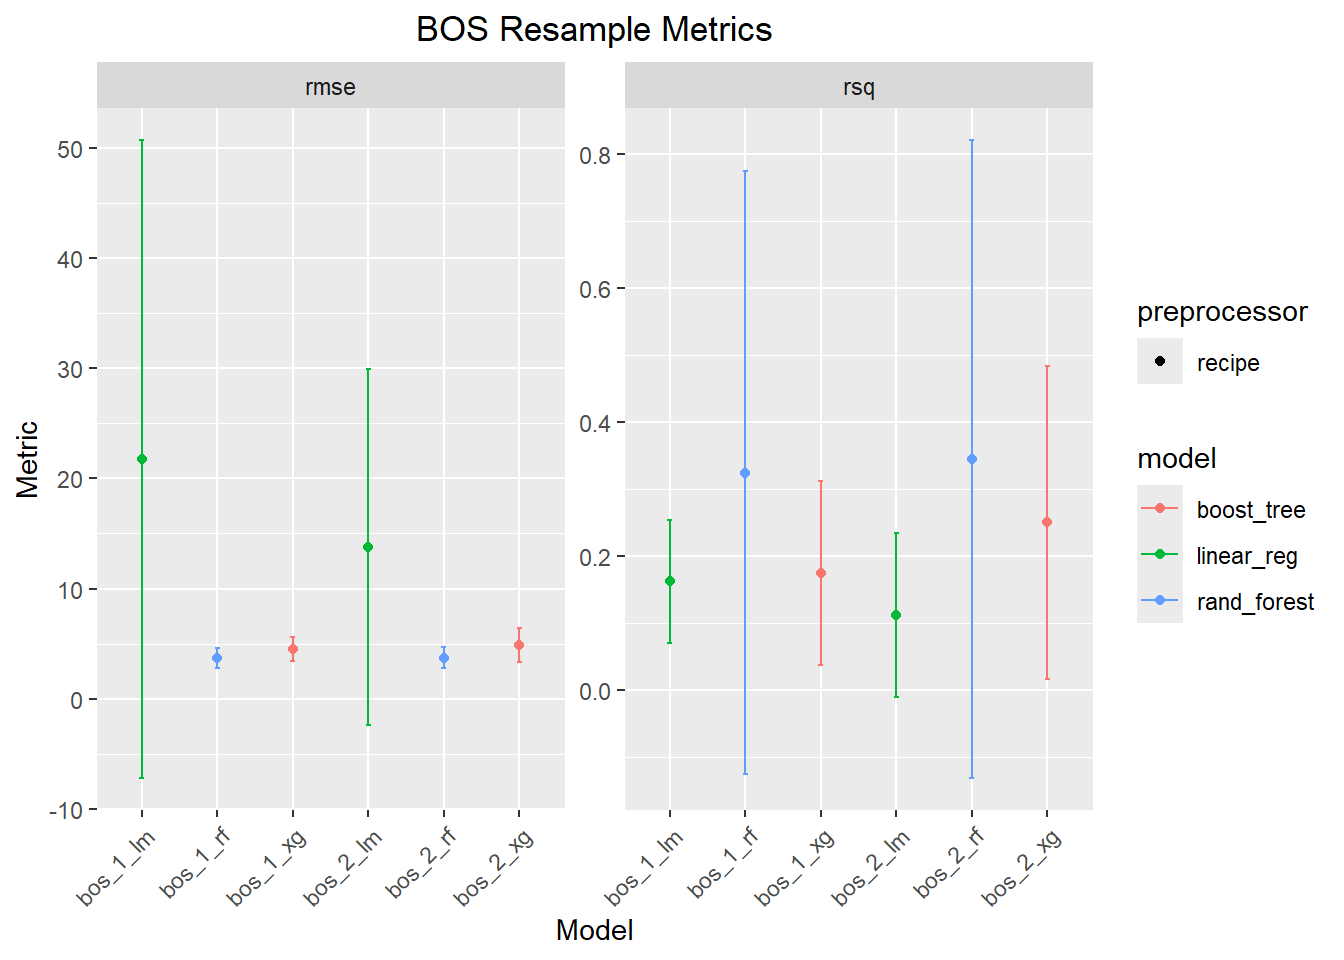

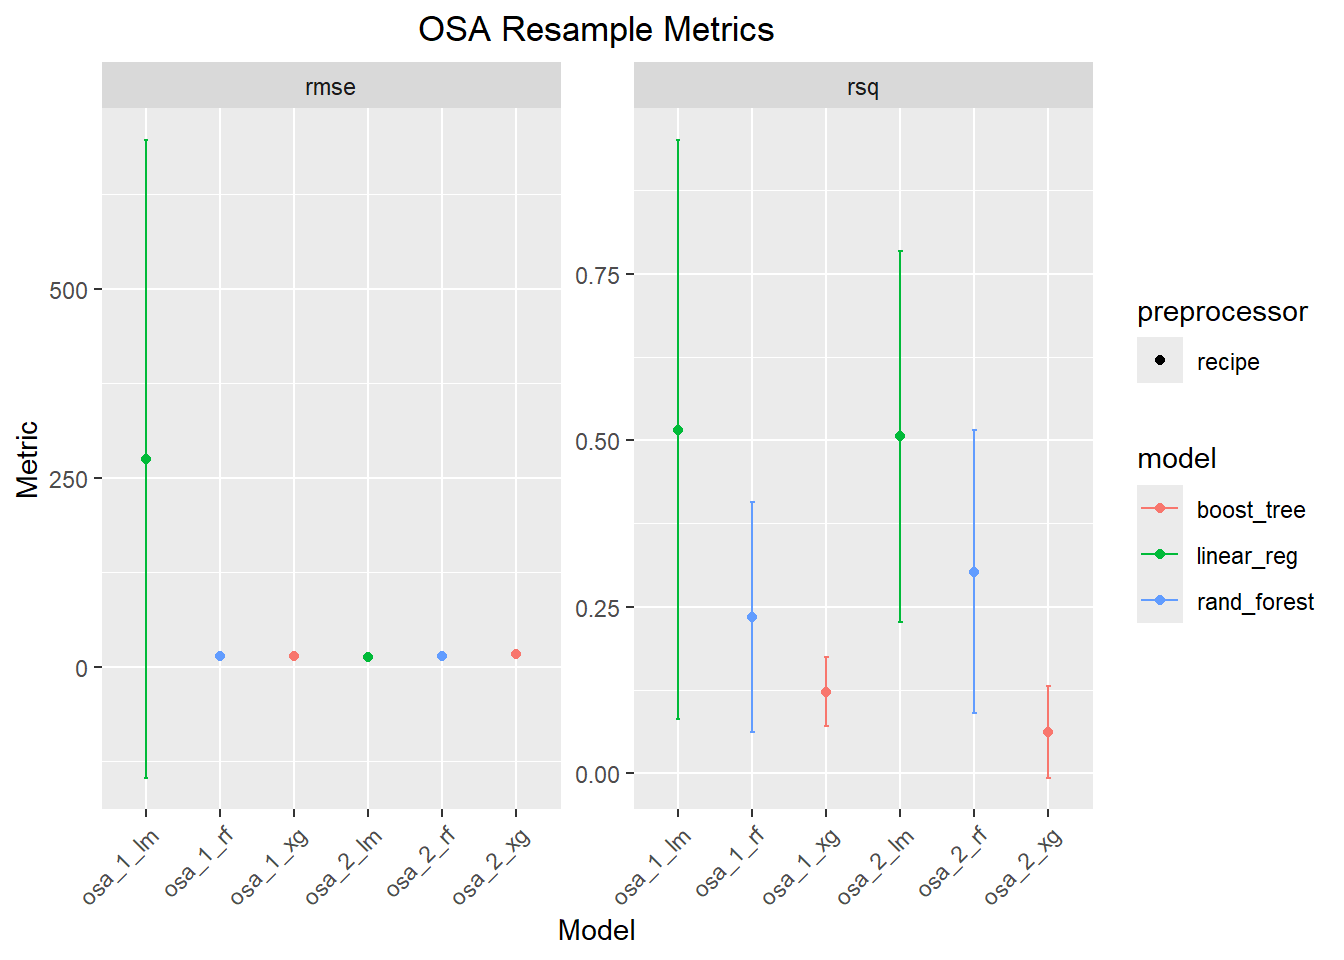

# A tibble: 12 × 9
   wflow_id .config        .metric   mean std_err     n preprocessor model  rank
   <chr>    <chr>          <chr>    <dbl>   <dbl> <int> <chr>        <chr> <int>
 1 bos_2_rf Preprocessor1… rmse     3.74   0.599      3 recipe       rand…     1
 2 bos_2_rf Preprocessor1… rsq      0.344  0.290      3 recipe       rand…     1
 3 bos_1_rf Preprocessor1… rmse     3.70   0.567      3 recipe       rand…     2
 4 bos_1_rf Preprocessor1… rsq      0.324  0.274      3 recipe       rand…     2
 5 bos_2_xg Preprocessor1… rmse     4.89   0.941      3 recipe       boos…     3
 6 bos_2_xg Preprocessor1… rsq      0.250  0.142      3 recipe       boos…     3
 7 bos_1_xg Preprocessor1… rmse     4.50   0.660      3 recipe       boos…     4
 8 bos_1_xg Preprocessor1… rsq      0.174  0.0838     3 recipe       boos…     4
 9 bos_1_lm Preprocessor1… rmse    21.7   17.6        3 recipe       line…     5
10 bos_1_lm Preprocessor1… rsq      0.162  0.0557     3 recipe       line…     5
11 bos_2_

# A tibble: 12 × 9
   wflow_id .config       .metric    mean std_err     n preprocessor model  rank
   <chr>    <chr>         <chr>     <dbl>   <dbl> <int> <chr>        <chr> <int>
 1 osa_1_lm Preprocessor… rmse    2.75e+2 2.56e+2     3 recipe       line…     1
 2 osa_1_lm Preprocessor… rsq     5.16e-1 2.64e-1     3 recipe       line…     1
 3 osa_2_lm Preprocessor… rmse    1.35e+1 1.71e+0     3 recipe       line…     2
 4 osa_2_lm Preprocessor… rsq     5.05e-1 1.70e-1     3 recipe       line…     2
 5 osa_2_rf Preprocessor… rmse    1.40e+1 2.45e+0     3 recipe       rand…     3
 6 osa_2_rf Preprocessor… rsq     3.02e-1 1.29e-1     3 recipe       rand…     3
 7 osa_1_rf Preprocessor… rmse    1.38e+1 2.41e+0     3 recipe       rand…     4
 8 osa_1_rf Preprocessor… rsq     2.34e-1 1.05e-1     3 recipe       rand…     4
 9 osa_1_xg Preprocessor… rmse    1.46e+1 2.16e+0     3 recipe       boos…     5
10 osa_1_xg Preprocessor… rsq     1.23e-1 3.11e-2     3 recipe       boos…     5
11 osa_2_

In [ ]:
# Visualize Model Performance
autoplot(bos_wf_set) + 
  aes(x = wflow_id) + 
  labs(title = "BOS Resample Metrics",
       x = "Model") +
  theme(plot.title = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 45, hjust = 1))

#### Model Tuning

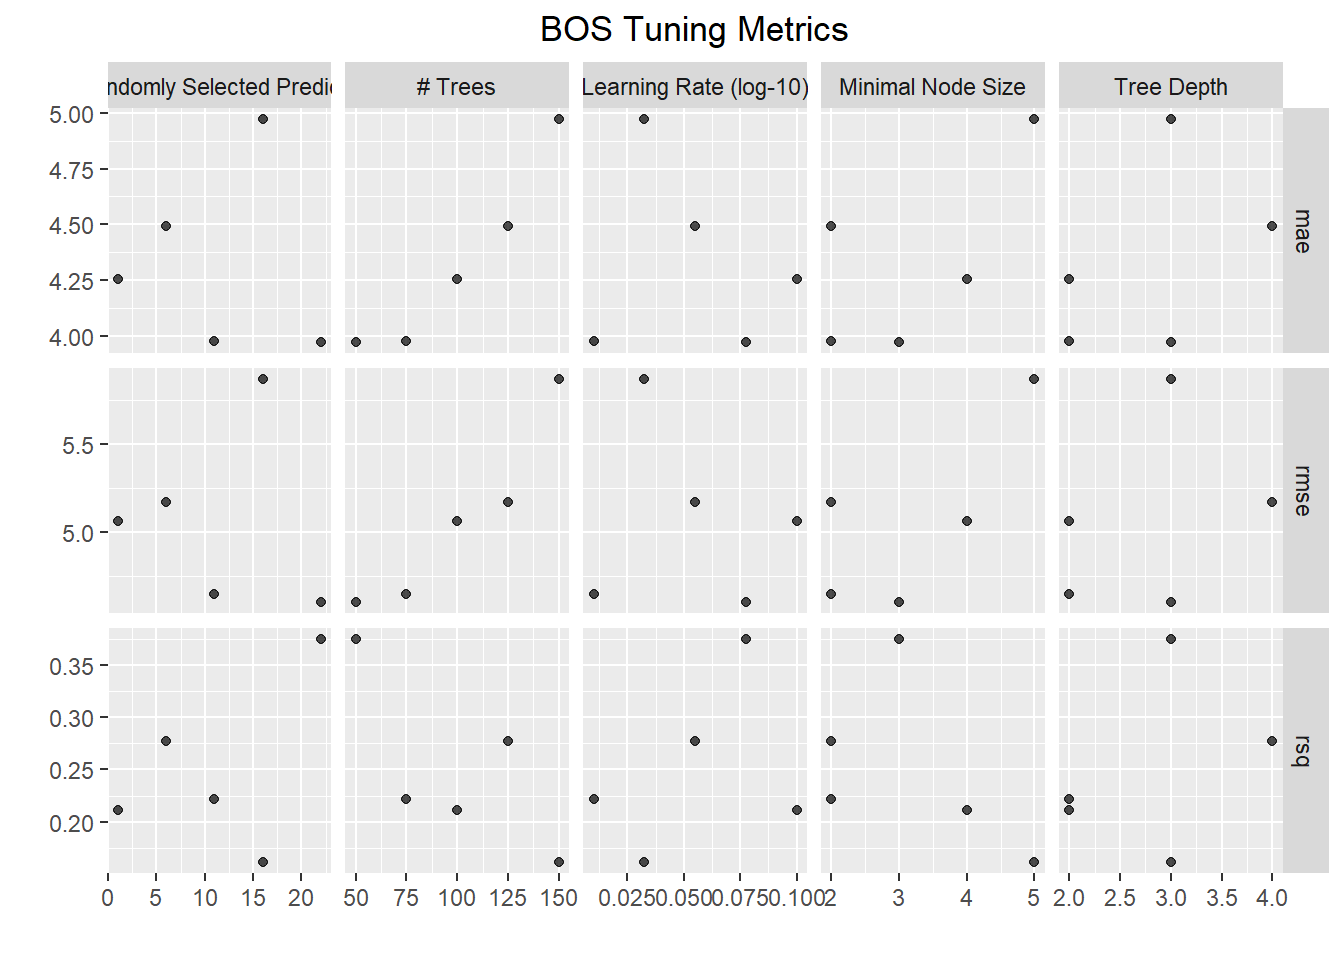

→ A | warning: 8 columns were requested but there were 4 predictors in the data. 4 will be used.

There were issues with some computations   A: x1

→ B | warning: 11 columns were requested but there were 4 predictors in the data. 4 will be used.

There were issues with some computations   A: x1
→ C | warning: 15 columns were requested but there were 4 predictors in the data. 4 will be used.
There were issues with some computations   A: x1
→ D | warning: 18 columns were requested but there were 4 predictors in the data. 4 will be used.
There were issues with some computations   A: x1
→ E | warning: 22 columns were requested but there were 4 predictors in the data. 4 will be used.
There were issues with some computations   A: x1
There were issues with some computations   A: x3   B: x3   C: x3   D: x3   E: x3

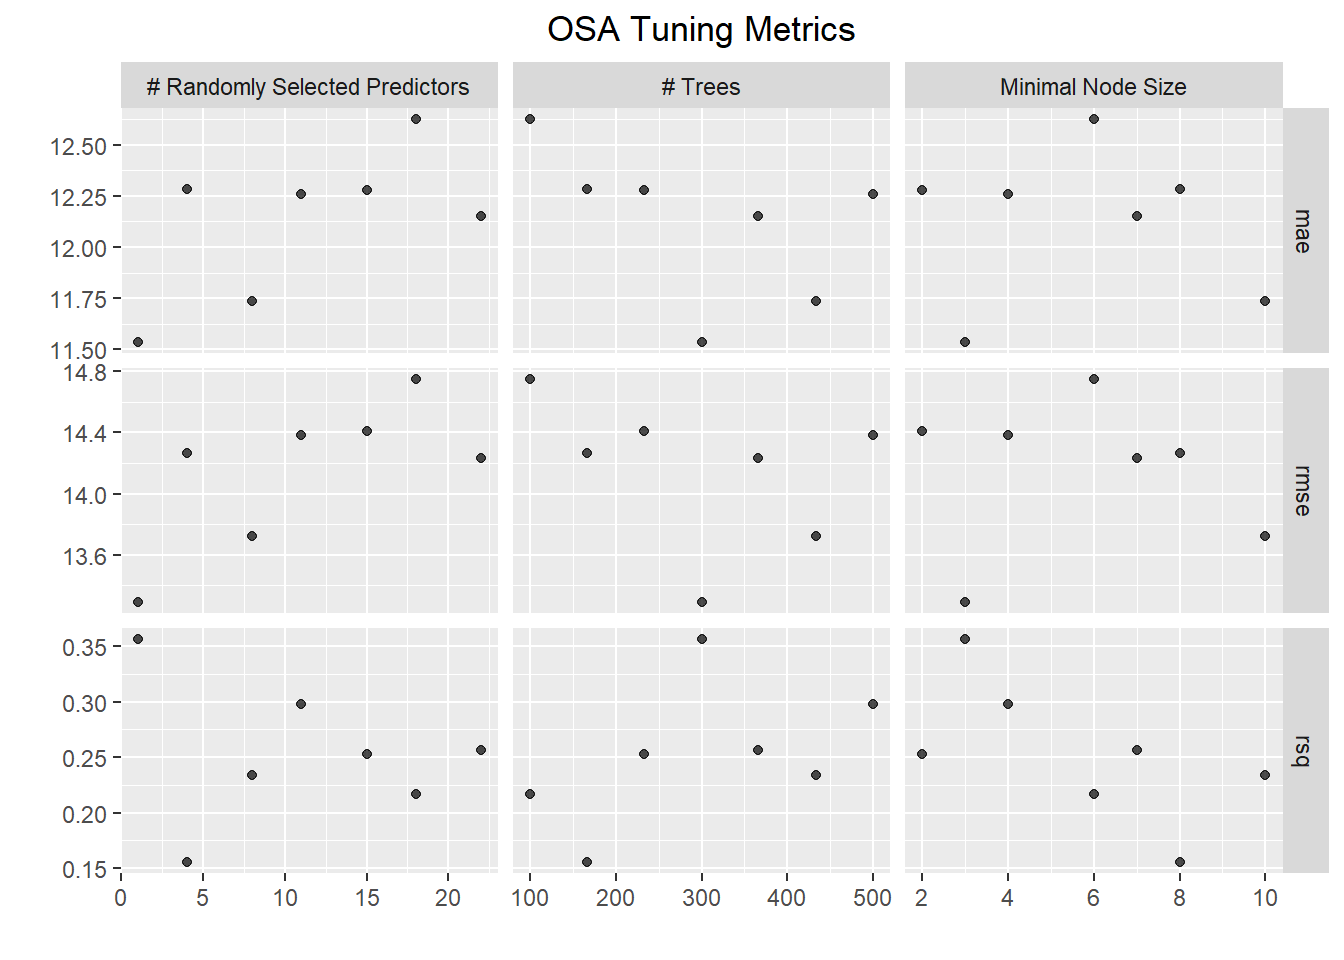

In [ ]:
# BOS Model Tuning (XGBoost)
tuned_bos_model <- boost_tree(
  mtry = tune(),
  trees = tune(),
  min_n = tune(),
  learn_rate = tune(),
  tree_depth = tune()
) %>%
  set_engine("xgboost") %>%
  set_mode("regression")

tune_bos_wf <- workflow() %>%
  add_recipe(rec_bos_2) %>%
  add_model(tuned_bos_model)

# Create parameter set
bos_dials <- parameters(
  mtry(range = c(1, ncol(up_train) - 1)), # Adjust range as needed
  trees(range = c(50, 150)),
  min_n(range = c(2, 5)),
  learn_rate(range = c(0.01, 0.1)),
  tree_depth(range = c(2, 4))
)

bos_grid <- grid_space_filling(bos_dials, size = 5)

bos_model_params <- tune_grid(
  tune_bos_wf,
  resamples = up_3cv,
  grid = bos_grid,
  metrics = metric_set(rmse, rsq, mae),
  control = control_grid(save_pred = TRUE),
  param_info = bos_dials
)

autoplot(bos_model_params) +
  labs(title = "BOS Tuning Metrics") + 
  theme(plot.title = element_text(hjust = 0.5))

#### Model Tuning Results

Warning in min(x, na.rm = na.rm): no non-missing arguments to min; returning
Inf

Warning in max(x, na.rm = na.rm): no non-missing arguments to max; returning
-Inf

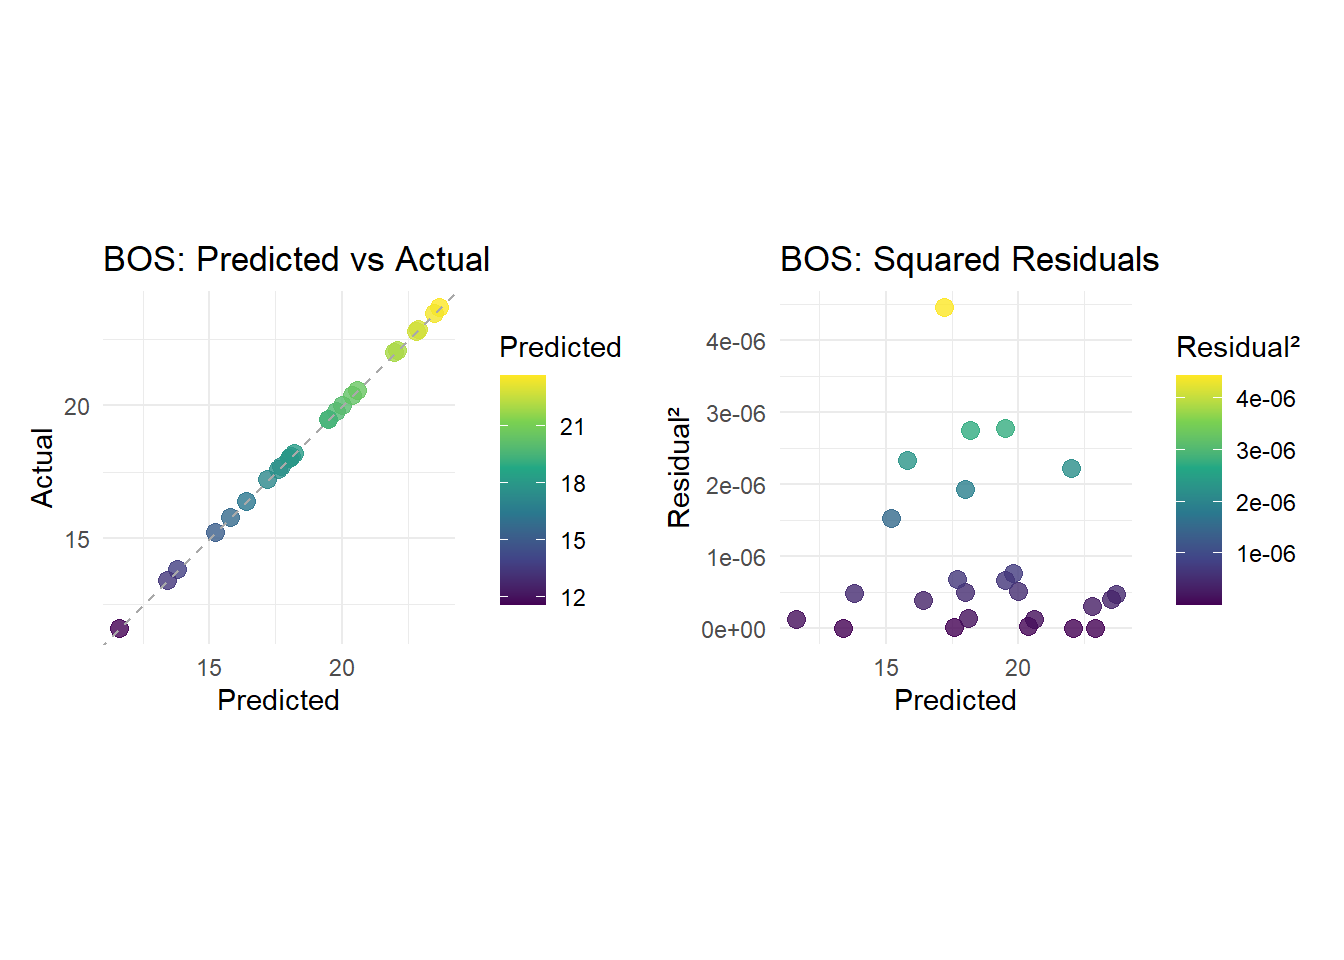

Warning in min(x, na.rm = na.rm): no non-missing arguments to min; returning
Inf

Warning in max(x, na.rm = na.rm): no non-missing arguments to max; returning
-Inf

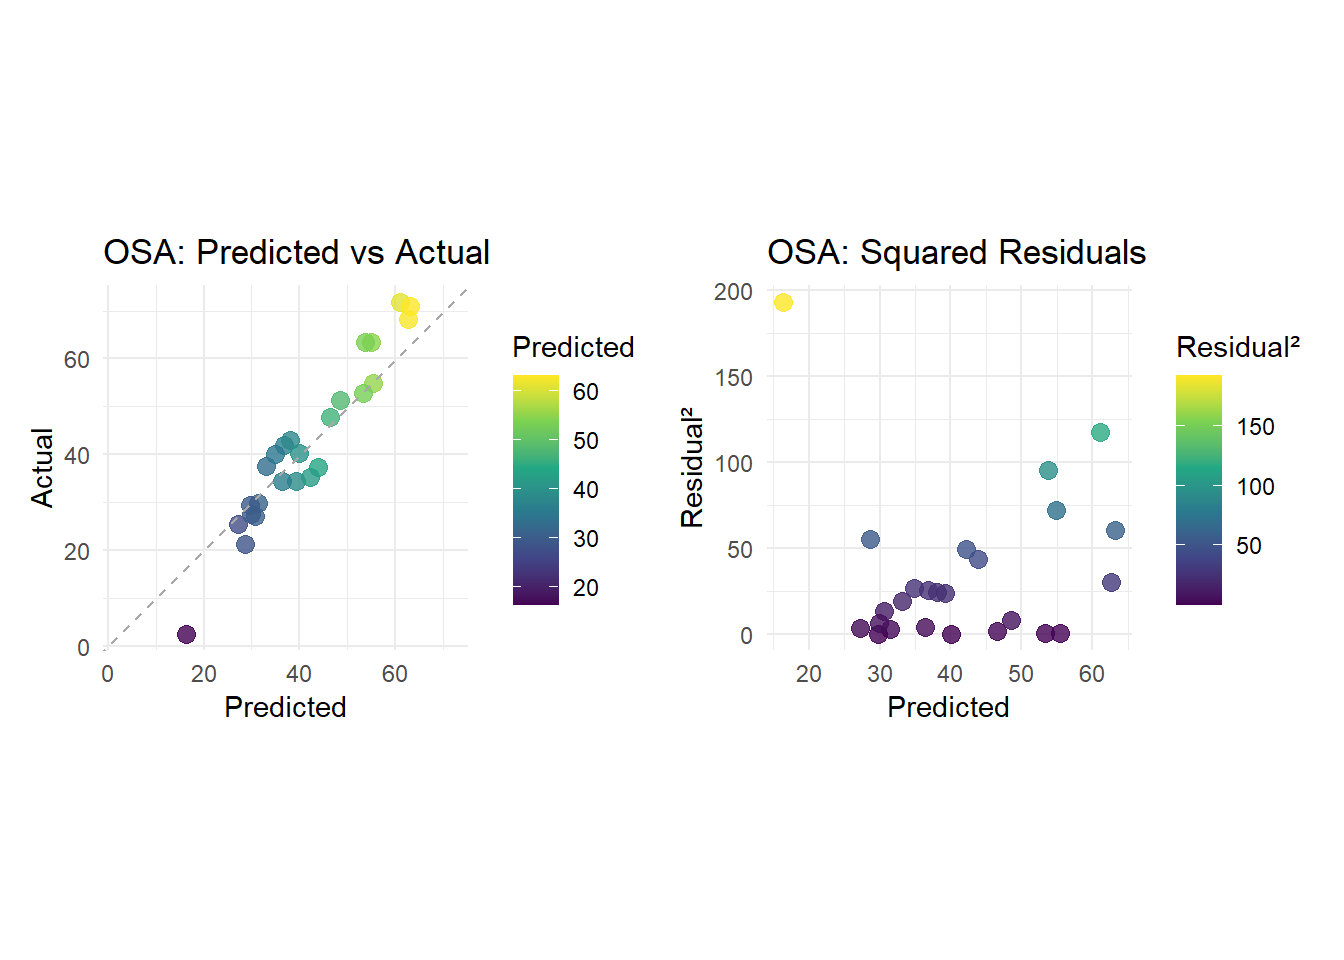

In [ ]:
# Finalize and fit full model for BOS
bos_final_fit_full <- fit(bos_final_wf, data = urban_parks_data)
bos_augmented_preds <- augment(bos_final_fit_full, new_data = urban_parks_data)

# Add residuals
bos_augmented_preds <- bos_augmented_preds %>% 
  mutate(residual_sq = (mean_percent_built_open_space - .pred)^2)

# Determine common axis ranges
bos_range <- range(c(bos_augmented_preds$.pred, bos_augmented_preds$mean_percent_built_open_space), na.rm = TRUE)
bos_residuals_range <- range(bos_augmented_preds$residuals_sq, na.rm = TRUE)

#### Results Summary

### Discussion

#### Final Conclusions

## References